In [1]:
# Import packages and implement notebook settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(shuffle = True, random_state = 0)


pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)

%matplotlib inline 

sns.set_theme(style="darkgrid")


# Data Import

In [2]:
import os

current_directory = os.getcwd()

dataframes = ['features.csv', 'features_dum_drop.csv', 'features_dum_nodrop.csv', 'features_encoded.csv',
              'response.csv',
              'X_train_drop.csv', 'X_test_drop.csv', 'y_train_drop.csv', 'y_test_drop.csv',
              'X_train_nodrop.csv', 'X_test_nodrop.csv', 'y_train_nodrop.csv', 'y_test_nodrop.csv',
              'X_train_encoded.csv', 'X_test_encoded.csv', 'y_train_encoded.csv', 'y_test_encoded.csv',
              'X_train_drop_scaled.csv', 'X_test_drop_scaled.csv',
              'X_train_nodrop_scaled.csv', 'X_test_nodrop_scaled.csv']

loaded_dataframes = {}

for file_name in dataframes:
    
    df_name = file_name.split('.csv')[0]
    file_path = os.path.join(current_directory, file_name)
    loaded_dataframes[df_name] = pd.read_csv(file_path, sep='\t')



In [3]:
features = loaded_dataframes['features']
features_dum_drop = loaded_dataframes['features_dum_drop']
features_dum_nodrop = loaded_dataframes['features_dum_nodrop']
features_encoded = loaded_dataframes['features_encoded']

response = loaded_dataframes['response']


X_train_drop = loaded_dataframes['X_train_drop']
X_test_drop= loaded_dataframes['X_test_drop']
y_train_drop = loaded_dataframes['y_train_drop']['SalePrice']
y_test_drop = loaded_dataframes['y_test_drop']['SalePrice']

X_train_encoded = loaded_dataframes['X_train_encoded']
X_test_encoded = loaded_dataframes['X_test_encoded']
y_train_encoded = loaded_dataframes['y_train_encoded']['SalePrice']
y_test_encoded = loaded_dataframes['y_test_encoded']['SalePrice']

# Random Forest
 

## Random Forest - Dummification - Base Model

In [4]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 0)

rf.fit(X = X_train_drop,y = np.log(y_train_drop))

print('Best train score: ' + str(rf.score(X = X_train_drop,y = np.log(y_train_drop))))
print('Best test score: ' + str(rf.score(X = X_test_drop,y = np.log(y_test_drop))))


Best train score: 0.9851330341300014
Best test score: 0.9055876420950552


In [5]:
rf_drop_train_test_score = pd.DataFrame({'Model': ['Random Forest_Drop'],
              'Train Score': [rf.score(X = X_train_drop,y = np.log(y_train_drop))],
              'Test Score': [rf.score(X = X_test_drop,y = np.log(y_test_drop))]
             })
rf_drop_train_test_score

,Model,Train Score,Test Score
0,Random Forest_Drop,0.985133,0.905588


<Axes: xlabel='Feature', ylabel='Importance'>

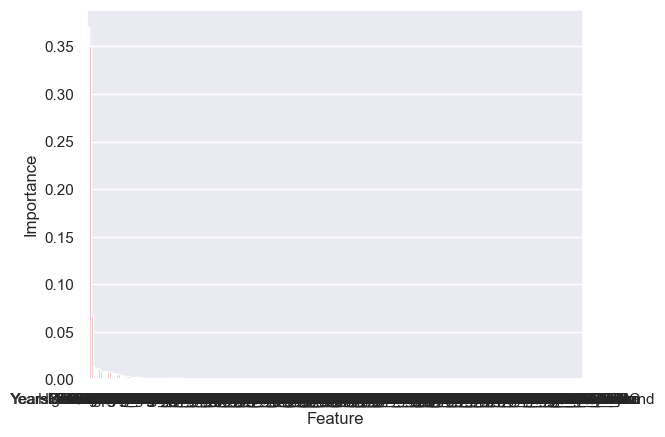

In [6]:
rf_drop_feature_importances = pd.Series(rf.feature_importances_, index=X_train_drop.columns).sort_values(ascending=False)


sns.barplot(data = pd.DataFrame(data = pd.DataFrame(data = rf_drop_feature_importances,  columns = [ 'Importance']).reset_index().rename(columns = {'index': 'Feature'})), y = 'Importance', x = 'Feature')


In [7]:
def list_intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [8]:
cat_signif_feat_list_rf_drop = []

for feat in rf_drop_feature_importances.index:
    if "_" in feat:
        cat_signif_feat_list_rf_drop.append(feat.split('_')[0])


cat_features_col = features.select_dtypes(include=['object']).columns

cat_signif_feat_list_rf_drop = list(set(list_intersection(cat_signif_feat_list_rf_drop, cat_features_col)))
cat_signif_feat_list_rf_drop

['GarageQual',
 'CentralAir',
 'ExterQual',
 'Foundation',
 'Functional',
 'LotConfig',
 'BsmtFinType1',
 'Exterior1st',
 'Exterior2nd',
 'SaleType',
 'HeatingQC',
 'Heating',
 'Condition2',
 'Street',
 'SaleCondition',
 'FireplaceQu',
 'GarageType',
 'BsmtCond',
 'BsmtFinType2',
 'LandContour',
 'Electrical',
 'PavedDrive',
 'BsmtExposure',
 'Utilities',
 'KitchenQual',
 'PoolQC',
 'BsmtQual',
 'ExterCond',
 'HouseStyle',
 'MiscFeature',
 'GarageFinish',
 'RoofMatl',
 'Fence',
 'RoofStyle',
 'MasVnrType',
 'MSZoning',
 'Alley',
 'BldgType',
 'LotShape',
 'Neighborhood',
 'LandSlope',
 'Condition1',
 'GarageCond']

Text(0, 0.5, 'Actual SalePrice')

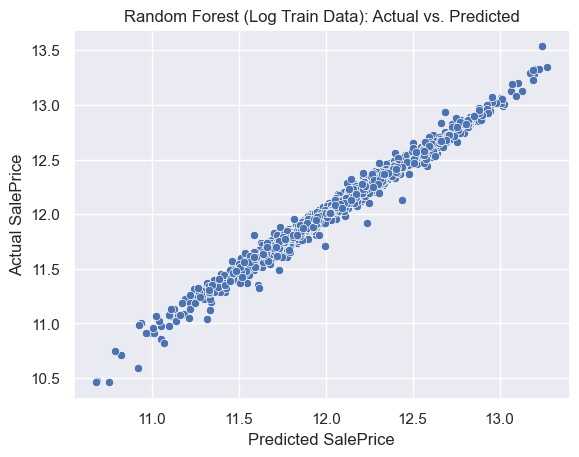

In [9]:
sns.scatterplot(x = rf.predict(X_train_drop), y = np.log(y_train_drop))
plt.title('Random Forest (Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

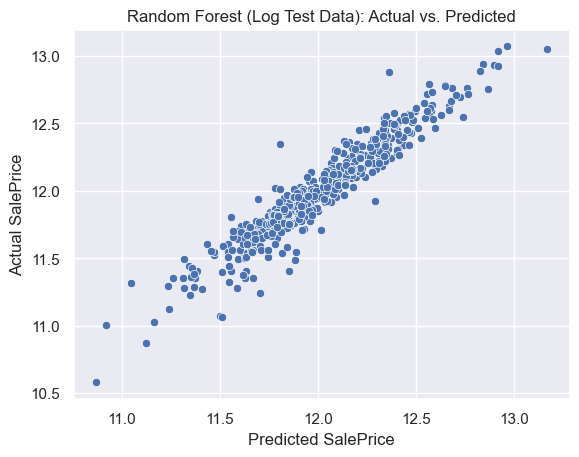

In [10]:
sns.scatterplot(x = rf.predict(X_test_drop), y = np.log(y_test_drop))
plt.title('Random Forest (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

## Random Forest - Dummification - Cross-Validation


In [11]:

rf = RandomForestRegressor(random_state = 0)

rf_drop_cv = cross_val_score(estimator = rf, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'r2')


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

In [12]:
print('Mean cross-validation score: ' + str(rf_drop_cv.mean()))
print('Std dev cross-validation score: ' + str(rf_drop_cv.std()))

Mean cross-validation score: 0.8959176264969526
Std dev cross-validation score: 0.011052736880113474


## Random Forest - Dummification - Hyperparameter Tuning


In [13]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state = 0)


params = {'n_estimators': [40, 50, 60],
         'max_depth': [10, 15, 20, 25, 30, 35, 40],
         'max_features': [1,2,3],
         'min_samples_leaf': [1],
         'min_samples_split': [2,3,4]}

gsCV = GridSearchCV(rf, params, cv = kf, return_train_score= True)

gsCV.fit(X_train_drop, np.log(y_train_drop))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [10, 15, 20, 25, 30, 35, 40],
                         'max_features': [1, 2, 3], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [40, 50, 60]},
             return_train_score=True)

In [14]:
gsCV_rf_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_rf_train_vs_test_df['model_number'] = gsCV_rf_train_vs_test_df['model_number'] + 1
gsCV_rf_train_vs_test_df['score_difference'] = gsCV_rf_train_vs_test_df['train_score'] - gsCV_rf_train_vs_test_df['test_score']

gsCV_rf_train_vs_test_df = gsCV_rf_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_rf_train_vs_test_df.head()


,model_number,score_difference,score_type,score
0,1,0.060934,train_score,0.707287
1,2,0.061120,train_score,0.709720
2,3,0.062895,train_score,0.707485
3,4,0.050446,train_score,0.699186
4,5,0.050987,train_score,0.704406


<Axes: xlabel='model_number', ylabel='score'>

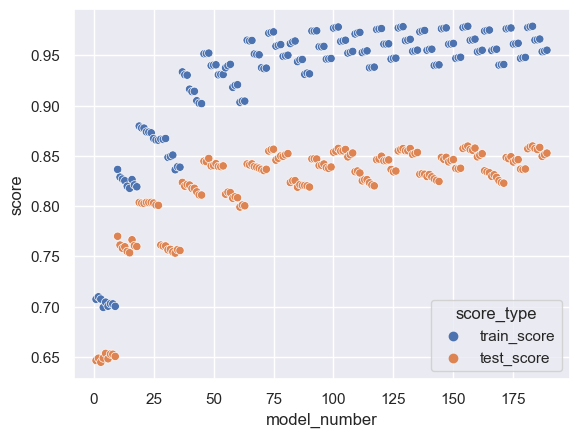

In [15]:
sns.scatterplot(data = gsCV_rf_train_vs_test_df, y = 'score', x = 'model_number', hue = 'score_type')

In [16]:
print('Best score: ' + str(gsCV.best_score_))
print('Best parameters: ' + str(gsCV.best_params_))


Best score: 0.859800555490023
Best parameters: {'max_depth': 40, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}


In [41]:
rf.set_params(max_depth = 40, max_features = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 60)
rf.fit(X = X_train_drop,y = np.log(y_train_drop))
print('Best train score: ' + str(rf.score(X = X_train_drop,y = np.log(y_train_drop))))
print('Best test score: ' + str(rf.score(X = X_test_drop,y = np.log(y_test_drop))))


Best train score: 0.980299105653034
Best test score: 0.8686556062203734


In [42]:
rf_drop_tuned_train_test_score = pd.DataFrame({'Model': ['Random Forest_Drop_Tuned'],
              'Train Score': [rf.score(X = X_train_drop,y = np.log(y_train_drop))],
              'Test Score': [rf.score(X = X_test_drop,y = np.log(y_test_drop))]
             })
rf_drop_tuned_train_test_score

,Model,Train Score,Test Score
0,Random Forest_Drop_Tuned,0.980299,0.868656


## Random Forest - Dummification - Post Tuning - Cross Validation

In [43]:

rf = RandomForestRegressor(random_state = 0, max_depth = 40, max_features = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 60)

rf_drop_cv_tuned = cross_val_score(estimator = rf, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'r2')


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

In [44]:
print('Mean cross-validation score: ' + str(rf_drop_cv_tuned.mean()))
print('Std dev cross-validation score: ' + str(rf_drop_cv_tuned.std()))

Mean cross-validation score: 0.8601999971474535
Std dev cross-validation score: 0.005282099112726272


## Random Forest - Encoded - Base Model

In [21]:

rf = RandomForestRegressor(random_state = 0)

rf.fit(X = X_train_encoded,y = np.log(y_train_encoded))

print('Best train score: ' + str(rf.score(X = X_train_encoded,y = np.log(y_train_encoded))))
print('Best test score: ' + str(rf.score(X = X_test_encoded,y = np.log(y_test_encoded))))


Best train score: 0.985300238642769
Best test score: 0.9063965790558169


In [22]:
rf_encoded_train_test_score = pd.DataFrame({'Model': ['Random Forest_Encoded'],
              'Train Score': [rf.score(X = X_train_encoded,y = np.log(y_train_encoded))],
              'Test Score': [rf.score(X = X_test_encoded,y = np.log(y_test_encoded))]
             })
rf_encoded_train_test_score

,Model,Train Score,Test Score
0,Random Forest_Encoded,0.9853,0.906397


<Axes: xlabel='Feature', ylabel='Importance'>

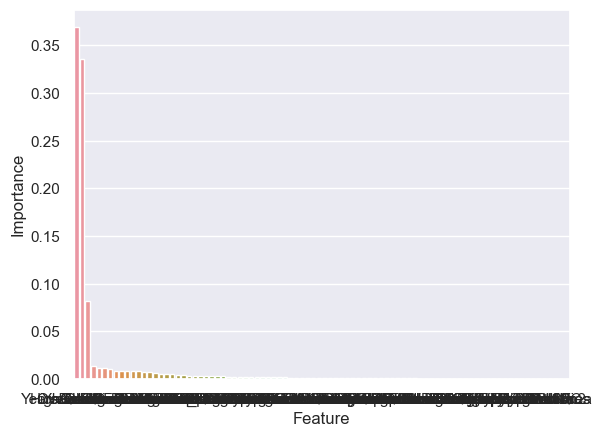

In [23]:
rf_encoded_feature_importances = pd.Series(rf.feature_importances_, index=X_train_encoded.columns).sort_values(ascending=False)
rf_encoded_feature_importances = pd.DataFrame(data = rf_encoded_feature_importances,  columns = [ 'Importance']).reset_index().rename(columns = {'index': 'Feature'})

sns.barplot(data = rf_encoded_feature_importances, y = 'Importance', x = 'Feature')


[Text(0, 0, 'OverallQual'),
 Text(1, 0, 'HighQualFinSF'),
 Text(2, 0, 'TotalSF'),
 Text(3, 0, 'GrLivArea'),
 Text(4, 0, 'LotArea'),
 Text(5, 0, 'GarageCars'),
 Text(6, 0, 'YearsBetweenBuildvsSold'),
 Text(7, 0, 'YearRemodAdd'),
 Text(8, 0, 'GarageArea'),
 Text(9, 0, 'CentralAir'),
 Text(10, 0, 'OverallCond'),
 Text(11, 0, 'YearsBetweenRemodvsSold'),
 Text(12, 0, 'YearBuilt'),
 Text(13, 0, 'BsmtUnfSF'),
 Text(14, 0, 'GarageYrBlt'),
 Text(15, 0, 'BsmtFinSF1'),
 Text(16, 0, 'BsmtFinSF'),
 Text(17, 0, '1stFlrSF'),
 Text(18, 0, 'Neighborhood'),
 Text(19, 0, 'TotalPorch_DeckSF'),
 Text(20, 0, 'LotFrontage'),
 Text(21, 0, 'BsmtQual'),
 Text(22, 0, 'TotalBsmtSF'),
 Text(23, 0, 'Fireplaces'),
 Text(24, 0, '2ndFlrSF'),
 Text(25, 0, 'BsmtFinType1'),
 Text(26, 0, 'OpenPorchSF'),
 Text(27, 0, 'GarageType'),
 Text(28, 0, 'MoSold'),
 Text(29, 0, 'MSZoning'),
 Text(30, 0, 'KitchenQual'),
 Text(31, 0, 'SaleCondition'),
 Text(32, 0, 'MasVnrArea'),
 Text(33, 0, 'TotalFullBath'),
 Text(34, 0, 'GarageCond'

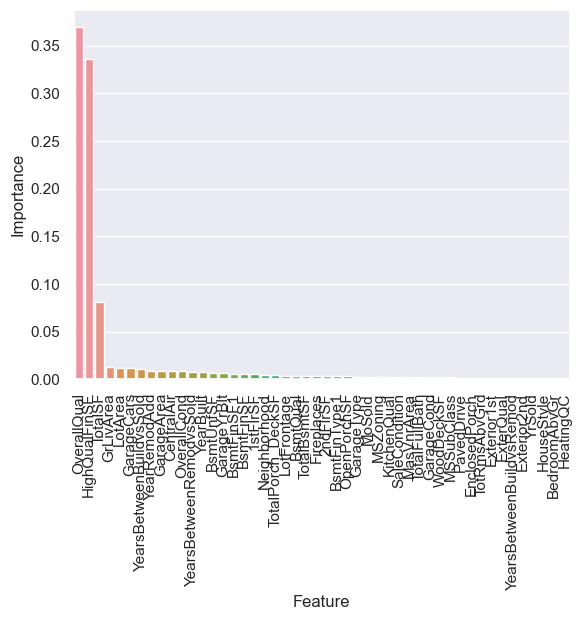

In [24]:

plot = sns.barplot(data = rf_encoded_feature_importances.loc[rf_encoded_feature_importances['Importance'] > 0.001, :], y = 'Importance', x = 'Feature')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)



[Text(0, 0, 'CentralAir'),
 Text(1, 0, 'Neighborhood'),
 Text(2, 0, 'BsmtQual'),
 Text(3, 0, 'BsmtFinType1'),
 Text(4, 0, 'GarageType'),
 Text(5, 0, 'MSZoning'),
 Text(6, 0, 'KitchenQual'),
 Text(7, 0, 'SaleCondition'),
 Text(8, 0, 'GarageCond'),
 Text(9, 0, 'PavedDrive'),
 Text(10, 0, 'Exterior1st'),
 Text(11, 0, 'ExterQual'),
 Text(12, 0, 'Exterior2nd'),
 Text(13, 0, 'HouseStyle'),
 Text(14, 0, 'HeatingQC'),
 Text(15, 0, 'Functional'),
 Text(16, 0, 'Condition1'),
 Text(17, 0, 'LotShape'),
 Text(18, 0, 'FireplaceQu'),
 Text(19, 0, 'Foundation'),
 Text(20, 0, 'BsmtExposure'),
 Text(21, 0, 'GarageFinish'),
 Text(22, 0, 'ExterCond'),
 Text(23, 0, 'LandContour'),
 Text(24, 0, 'Electrical'),
 Text(25, 0, 'BsmtCond'),
 Text(26, 0, 'GarageQual'),
 Text(27, 0, 'LotConfig'),
 Text(28, 0, 'RoofStyle'),
 Text(29, 0, 'SaleType'),
 Text(30, 0, 'Fence'),
 Text(31, 0, 'LandSlope'),
 Text(32, 0, 'BldgType'),
 Text(33, 0, 'MasVnrType'),
 Text(34, 0, 'Alley'),
 Text(35, 0, 'BsmtFinType2'),
 Text(36, 0,

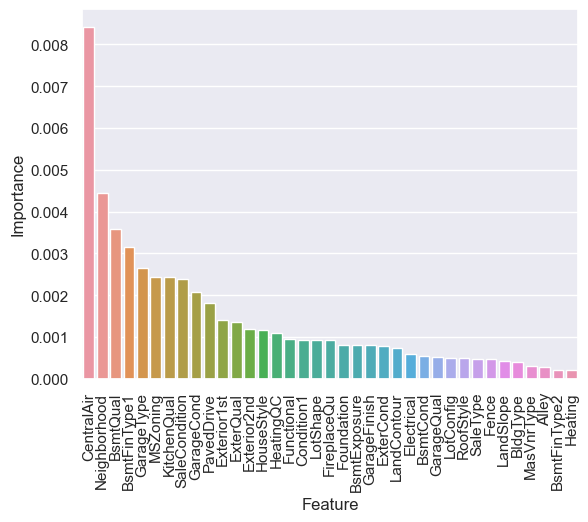

In [25]:

cat_features_col = features.select_dtypes(include=['object']).columns


plot = sns.barplot(data = rf_encoded_feature_importances.loc[(rf_encoded_feature_importances['Importance'] > 0.0001) & (rf_encoded_feature_importances['Feature'].isin(list_intersection(list(rf_encoded_feature_importances['Feature']),cat_features_col))), :], y = 'Importance', x = 'Feature')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)




Text(0, 0.5, 'Actual SalePrice')

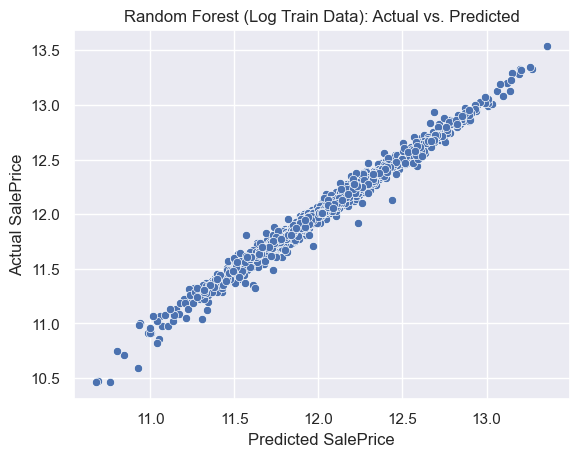

In [26]:
sns.scatterplot(x = rf.predict(X_train_encoded), y = np.log(y_train_encoded))
plt.title('Random Forest (Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

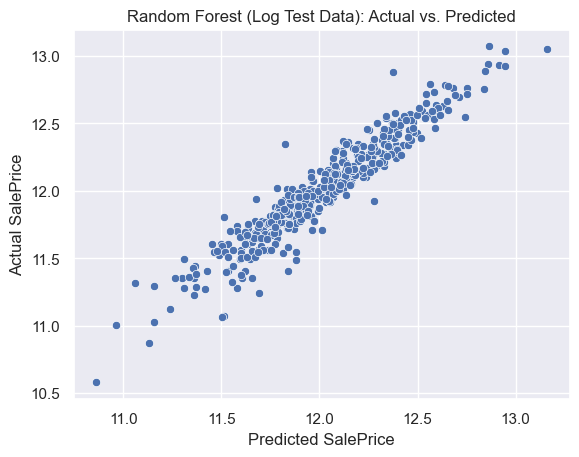

In [27]:
sns.scatterplot(x = rf.predict(X_test_encoded), y = np.log(y_test_encoded))
plt.title('Random Forest (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

## Random Forest - Encoded - Cross Validation

In [28]:

rf = RandomForestRegressor(random_state = 0)

rf_encoded_cv = cross_val_score(estimator = rf, X = features_encoded, y = np.log(response), cv = kf, scoring = 'r2')


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

In [29]:
print('Mean cross-validation score: ' + str(rf_encoded_cv.mean()))
print('Std dev cross-validation score: ' + str(rf_encoded_cv.std()))

Mean cross-validation score: 0.8961400238701227
Std dev cross-validation score: 0.010958527189272652


## Random Forest - Encoded - Hyperparameter Tuning

In [30]:

rf = RandomForestRegressor(random_state = 0)


params = {'n_estimators': [40, 50, 60],
         'max_depth': [10, 15, 20, 25, 30, 35, 40],
         'max_features': [1,2,3],
         'min_samples_leaf': [1],
         'min_samples_split': [2,3,4]}

gsCV = GridSearchCV(rf, params, cv = kf, return_train_score= True)

gsCV.fit(X_train_encoded, np.log(y_train_encoded))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [10, 15, 20, 25, 30, 35, 40],
                         'max_features': [1, 2, 3], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [40, 50, 60]},
             return_train_score=True)

In [31]:
gsCV_rf_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_rf_train_vs_test_df['model_number'] = gsCV_rf_train_vs_test_df['model_number'] + 1
gsCV_rf_train_vs_test_df['score_difference'] = gsCV_rf_train_vs_test_df['train_score'] - gsCV_rf_train_vs_test_df['test_score']

gsCV_rf_train_vs_test_df = gsCV_rf_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_rf_train_vs_test_df.head()


,model_number,score_difference,score_type,score
0,1,0.082456,train_score,0.886290
1,2,0.082779,train_score,0.887299
2,3,0.083199,train_score,0.887891
3,4,0.078613,train_score,0.883400
4,5,0.078890,train_score,0.883637


<Axes: xlabel='model_number', ylabel='score'>

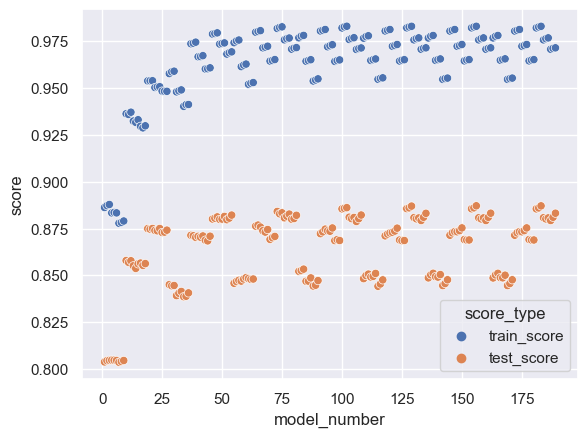

In [32]:
sns.scatterplot(data = gsCV_rf_train_vs_test_df, y = 'score', x = 'model_number', hue = 'score_type')

In [33]:
print('Best score: ' + str(gsCV.best_score_))
print('Best parameters: ' + str(gsCV.best_params_))


Best score: 0.8871860539095872
Best parameters: {'max_depth': 35, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}


In [45]:
rf.set_params(max_depth = 35, max_features = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 60)
rf.fit(X = X_train_encoded,y = np.log(y_train_encoded))
print('Best train score: ' + str(rf.score(X = X_train_encoded,y = np.log(y_train_encoded))))
print('Best test score: ' + str(rf.score(X = X_test_encoded,y = np.log(y_test_encoded))))


Best train score: 0.9837859355766423
Best test score: 0.8933118038344607


In [46]:
rf_encoded_tuned_train_test_score = pd.DataFrame({'Model': ['Random Forest_Encoded_Tuned'],
              'Train Score': [rf.score(X = X_train_encoded,y = np.log(y_train_encoded))],
              'Test Score': [rf.score(X = X_test_encoded,y = np.log(y_test_encoded))]
             })
rf_encoded_tuned_train_test_score

,Model,Train Score,Test Score
0,Random Forest_Encoded_Tuned,0.983786,0.893312


## Random Forest - Encoded - Post Tuning - Cross Validation

In [47]:

rf = RandomForestRegressor(random_state = 0, max_depth = 35, max_features = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 60)

rf_encoded_cv_tuned = cross_val_score(estimator = rf, X = features_encoded, y = np.log(response), cv = kf, scoring = 'r2')


/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bryceferraro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

In [48]:
print('Mean cross-validation score: ' + str(rf_encoded_cv_tuned.mean()))
print('Std dev cross-validation score: ' + str(rf_encoded_cv_tuned.std()))

Mean cross-validation score: 0.8861535295674872
Std dev cross-validation score: 0.007670682197154449


# Model Results Export

In [49]:
rf_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                      'Random Forest_Drop': rf_drop_cv,
                                      'Random Forest_Drop_Tuned': rf_drop_cv_tuned,
                                      'Random Forest_Encoded': rf_encoded_cv,
                                      'Random Forest_Encoded_Tuned': rf_encoded_cv_tuned
                                      
                                     }
                             )

rf_results

,Model Number,Random Forest_Drop,Random Forest_Drop_Tuned,Random Forest_Encoded,Random Forest_Encoded_Tuned
0,1.0,0.904563,0.867702,0.904214,0.889740
1,2.0,0.895470,0.862494,0.894247,0.882853
2,3.0,0.910247,0.862364,0.910630,0.899480
3,4.0,0.890853,0.853284,0.893156,0.879038
4,5.0,0.878456,0.855155,0.878453,0.879657


In [50]:
rf_train_test_score = pd.concat([rf_drop_train_test_score,
           rf_drop_tuned_train_test_score,
           rf_encoded_train_test_score,
           rf_encoded_tuned_train_test_score
          ])
rf_train_test_score

,Model,Train Score,Test Score
0,Random Forest_Drop,0.985133,0.905588
0,Random Forest_Drop_Tuned,0.980299,0.868656
0,Random Forest_Encoded,0.985300,0.906397
0,Random Forest_Encoded_Tuned,0.983786,0.893312


In [51]:

current_directory = os.getcwd()

dataframes = {'rf_results': rf_results,
             'rf_train_test_score': rf_train_test_score
             }


for name, df in dataframes.items():

    file_path = os.path.join(current_directory, f"{name}.csv")
    
    df.to_csv(file_path, sep='\t', index=False)